# Regression

# Introduction

## Importing the libraries

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
#import missingno as mnso
import matplotlib.style as style

In [1]:
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, KFold, GridSearchCV 
from sklearn.model_selection import cross_val_score, learning_curve
from sklearn.metrics import mean_squared_error

from sklearn.svm import SVR
from sklearn.ensemble import ExtraTreesRegressor, RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression

## Importing the dataset

In [2]:
df_train = pd.read_csv('Train.csv') 
df_test = pd.read_csv('Test.csv') 
df_rider = pd.read_csv('Riders.csv') 
df_variable = pd.read_csv('VariableDefinitions.csv')

### Variable Definitions

In [6]:
df_variable.shape

(35, 2)

In [7]:
df_variable.head()

,Order No,Unique number identifying the order
0,User Id,Unique number identifying the customer on a pl...
1,Vehicle Type,"For this competition limited to bikes, however..."
2,Platform Type,"Platform used to place the order, there are 4 ..."
3,Personal or Business,Customer type
4,Placement - Day of Month,Placement - Day of Month i.e 1-31


# Exploritory Data Analysis

### Train Dataset

In [11]:
df_train.head()

,Order No,User Id,Vehicle Type,Platform Type,Personal or Business,Placement - Day of Month,Placement - Weekday (Mo = 1),Placement - Time,Confirmation - Day of Month,Confirmation - Weekday (Mo = 1),...,Arrival at Destination - Time,Distance (KM),Temperature,Precipitation in millimeters,Pickup Lat,Pickup Long,Destination Lat,Destination Long,Rider Id,Time from Pickup to Arrival
0,Order_No_4211,User_Id_633,Bike,3,Business,9,5,9:35:46 AM,9,5,...,10:39:55 AM,4,20.4,NaN,-1.317755,36.830370,-1.300406,36.829741,Rider_Id_432,745
1,Order_No_25375,User_Id_2285,Bike,3,Personal,12,5,11:16:16 AM,12,5,...,12:17:22 PM,16,26.4,NaN,-1.351453,36.899315,-1.295004,36.814358,Rider_Id_856,1993
2,Order_No_1899,User_Id_265,Bike,3,Business,30,2,12:39:25 PM,30,2,...,1:00:38 PM,3,NaN,NaN,-1.308284,36.843419,-1.300921,36.828195,Rider_Id_155,455
3,Order_No_9336,User_Id_1402,Bike,3,Business,15,5,9:25:34 AM,15,5,...,10:05:27 AM,9,19.2,NaN,-1.281301,36.832396,-1.257147,36.795063,Rider_Id_855,1341
4,Order_No_27883,User_Id_1737,Bike,1,Personal,13,1,9:55:18 AM,13,1,...,10:25:37 AM,9,15.4,NaN,-1.266597,36.792118,-1.295041,36.809817,Rider_Id_770,1214


In [26]:
len(df_train)

21201

In [14]:
df_train.shape

(21201, 29)

In [29]:
df_train.columns

Index(['Order No', 'User Id', 'Vehicle Type', 'Platform Type',
       'Personal or Business', 'Placement - Day of Month',
       'Placement - Weekday (Mo = 1)', 'Placement - Time',
       'Confirmation - Day of Month', 'Confirmation - Weekday (Mo = 1)',
       'Confirmation - Time', 'Arrival at Pickup - Day of Month',
       'Arrival at Pickup - Weekday (Mo = 1)', 'Arrival at Pickup - Time',
       'Pickup - Day of Month', 'Pickup - Weekday (Mo = 1)', 'Pickup - Time',
       'Arrival at Destination - Day of Month',
       'Arrival at Destination - Weekday (Mo = 1)',
       'Arrival at Destination - Time', 'Distance (KM)', 'Temperature',
       'Precipitation in millimeters', 'Pickup Lat', 'Pickup Long',
       'Destination Lat', 'Destination Long', 'Rider Id',
       'Time from Pickup to Arrival'],
      dtype='object')

In [27]:
df_train.describe()

,Platform Type,Placement - Day of Month,Placement - Weekday (Mo = 1),Confirmation - Day of Month,Confirmation - Weekday (Mo = 1),Arrival at Pickup - Day of Month,Arrival at Pickup - Weekday (Mo = 1),Pickup - Day of Month,Pickup - Weekday (Mo = 1),Arrival at Destination - Day of Month,Arrival at Destination - Weekday (Mo = 1),Distance (KM),Temperature,Precipitation in millimeters,Pickup Lat,Pickup Long,Destination Lat,Destination Long,Time from Pickup to Arrival
count,21201.000000,21201.000000,21201.000000,21201.000000,21201.000000,21201.000000,21201.000000,21201.000000,21201.000000,21201.000000,21201.000000,21201.000000,16835.000000,552.000000,21201.000000,21201.000000,21201.000000,21201.000000,21201.000000
mean,2.752182,15.653696,3.240083,15.653837,3.240225,15.653837,3.240225,15.653837,3.240225,15.653837,3.240225,9.506533,23.258889,7.905797,-1.281470,36.811264,-1.282581,36.811220,1556.920947
std,0.625178,8.798916,1.567295,8.798886,1.567228,8.798886,1.567228,8.798886,1.567228,8.798886,1.567228,5.668963,3.615768,17.089971,0.030507,0.037473,0.034824,0.044721,987.270788
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,11.200000,0.100000,-1.438302,36.653621,-1.430298,36.606594,1.000000
25%,3.000000,8.000000,2.000000,8.000000,2.000000,8.000000,2.000000,8.000000,2.000000,8.000000,2.000000,5.000000,20.600000,1.075000,-1.300921,36.784605,-1.301201,36.785661,882.000000
50%,3.000000,15.000000,3.000000,15.000000,3.000000,15.000000,3.000000,15.000000,3.000000,15.000000,3.000000,8.000000,23.500000,2.900000,-1.279395,36.807040,-1.284382,36.808002,1369.000000
75%,3.000000,23.000000,5.000000,23.000000,5.000000,23.000000,5.000000,23.000000,5.000000,23.000000,5.000000,13.000000,26.000000,4.900000,-1.257147,36.829741,-1.261177,36.829477,2040.000000
max,4.000000,31.000000,7.000000,31.000000,7.000000,31.000000,7.000000,31.000000,7.000000,31.000000,7.000000,49.000000,32.100000,99.100000,-1.147170,36.991046,-1.030225,37.016779,7883.000000


In [5]:
# Separating by data type
numeric_columns = []
object_columns = []
time_columns = []
for k, v in df_train.dtypes.items():
    if (v != object):
        if (k != "Time_Pic_Arr"):
            numeric_columns.append(k)
    elif k.endswith("Time"):
        time_columns.append(k)
    else:
        object_columns.append(k)

In [58]:
df_train[time_columns].head()

,Placement - Time,Confirmation - Time,Arrival at Pickup - Time,Pickup - Time,Arrival at Destination - Time
0,9:35:46 AM,9:40:10 AM,10:04:47 AM,10:27:30 AM,10:39:55 AM
1,11:16:16 AM,11:23:21 AM,11:40:22 AM,11:44:09 AM,12:17:22 PM
2,12:39:25 PM,12:42:44 PM,12:49:34 PM,12:53:03 PM,1:00:38 PM
3,9:25:34 AM,9:26:05 AM,9:37:56 AM,9:43:06 AM,10:05:27 AM
4,9:55:18 AM,9:56:18 AM,10:03:53 AM,10:05:23 AM,10:25:37 AM


In [49]:
df_train[object_columns].head()

,Order No,User Id,Vehicle Type,Personal or Business,Rider Id
0,Order_No_4211,User_Id_633,Bike,Business,Rider_Id_432
1,Order_No_25375,User_Id_2285,Bike,Personal,Rider_Id_856
2,Order_No_1899,User_Id_265,Bike,Business,Rider_Id_155
3,Order_No_9336,User_Id_1402,Bike,Business,Rider_Id_855
4,Order_No_27883,User_Id_1737,Bike,Personal,Rider_Id_770


In [45]:
df_train[numeric_columns].head()

,Platform Type,Placement - Day of Month,Placement - Weekday (Mo = 1),Confirmation - Day of Month,Confirmation - Weekday (Mo = 1),Arrival at Pickup - Day of Month,Arrival at Pickup - Weekday (Mo = 1),Pickup - Day of Month,Pickup - Weekday (Mo = 1),Arrival at Destination - Day of Month,Arrival at Destination - Weekday (Mo = 1),Distance (KM),Temperature,Precipitation in millimeters,Pickup Lat,Pickup Long,Destination Lat,Destination Long,Time from Pickup to Arrival
0,3,9,5,9,5,9,5,9,5,9,5,4,20.4,NaN,-1.317755,36.830370,-1.300406,36.829741,745
1,3,12,5,12,5,12,5,12,5,12,5,16,26.4,NaN,-1.351453,36.899315,-1.295004,36.814358,1993
2,3,30,2,30,2,30,2,30,2,30,2,3,NaN,NaN,-1.308284,36.843419,-1.300921,36.828195,455
3,3,15,5,15,5,15,5,15,5,15,5,9,19.2,NaN,-1.281301,36.832396,-1.257147,36.795063,1341
4,1,13,1,13,1,13,1,13,1,13,1,9,15.4,NaN,-1.266597,36.792118,-1.295041,36.809817,1214


### Test Dataset

In [9]:
print(f'train: {df_train.shape} \n  test: {df_test.shape} \n riders: {df_rider.shape}')

train: (21201, 29) 
  test: (7068, 25) 
 riders: (960, 5)


### Missing Values 

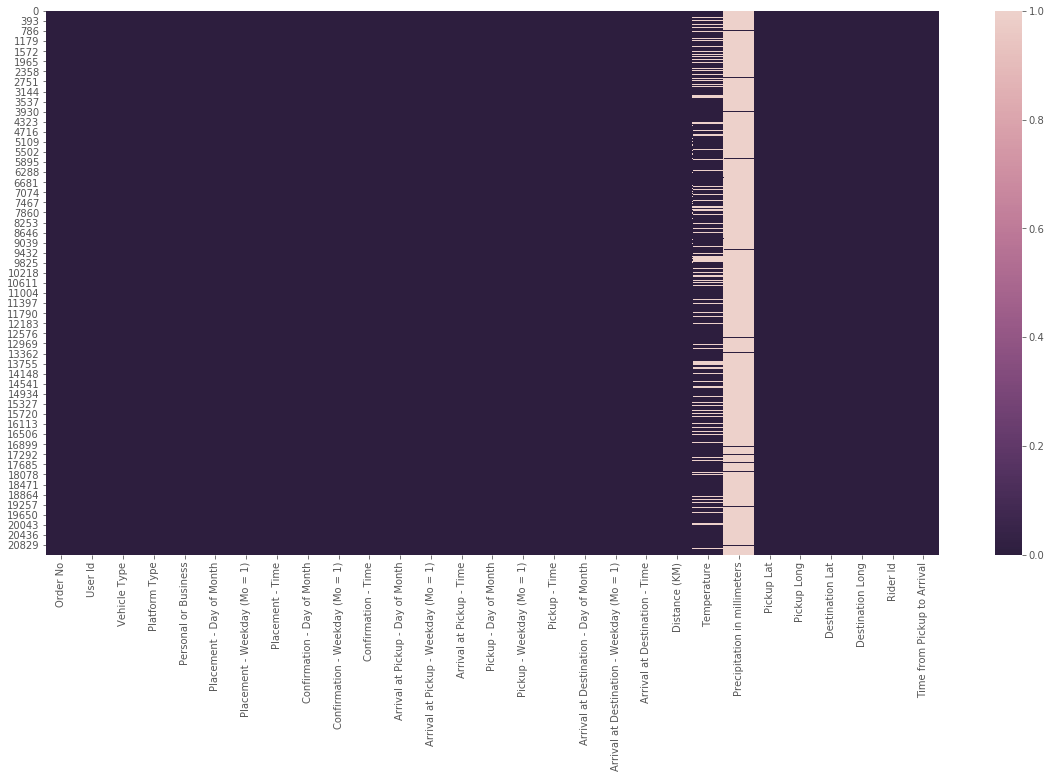

In [35]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(20, 10))
cmap = sns.cubehelix_palette(as_cmap=True, reverse=True)
sns.heatmap(df_train.isnull(), cmap=cmap)

In [15]:
df_train.isnull().sum()

Order No                                         0
User Id                                          0
Vehicle Type                                     0
Platform Type                                    0
Personal or Business                             0
Placement - Day of Month                         0
Placement - Weekday (Mo = 1)                     0
Placement - Time                                 0
Confirmation - Day of Month                      0
Confirmation - Weekday (Mo = 1)                  0
Confirmation - Time                              0
Arrival at Pickup - Day of Month                 0
Arrival at Pickup - Weekday (Mo = 1)             0
Arrival at Pickup - Time                         0
Pickup - Day of Month                            0
Pickup - Weekday (Mo = 1)                        0
Pickup - Time                                    0
Arrival at Destination - Day of Month            0
Arrival at Destination - Weekday (Mo = 1)        0
Arrival at Destination - Time  

In [13]:
# The Percentage of missing values in the df_train dataset
MP_df_train = df_train.isna().mean().round(4)*100
print('THE % OF MISSING VALUES IN THE DATASET:', MP_df_train)

THE % OF MISSING VALUES IN THE DATASET: Order No                                      0.00
User Id                                       0.00
Vehicle Type                                  0.00
Platform Type                                 0.00
Personal or Business                          0.00
Placement - Day of Month                      0.00
Placement - Weekday (Mo = 1)                  0.00
Placement - Time                              0.00
Confirmation - Day of Month                   0.00
Confirmation - Weekday (Mo = 1)               0.00
Confirmation - Time                           0.00
Arrival at Pickup - Day of Month              0.00
Arrival at Pickup - Weekday (Mo = 1)          0.00
Arrival at Pickup - Time                      0.00
Pickup - Day of Month                         0.00
Pickup - Weekday (Mo = 1)                     0.00
Pickup - Time                                 0.00
Arrival at Destination - Day of Month         0.00
Arrival at Destination - Weekday (Mo = 1) 

# Distribution

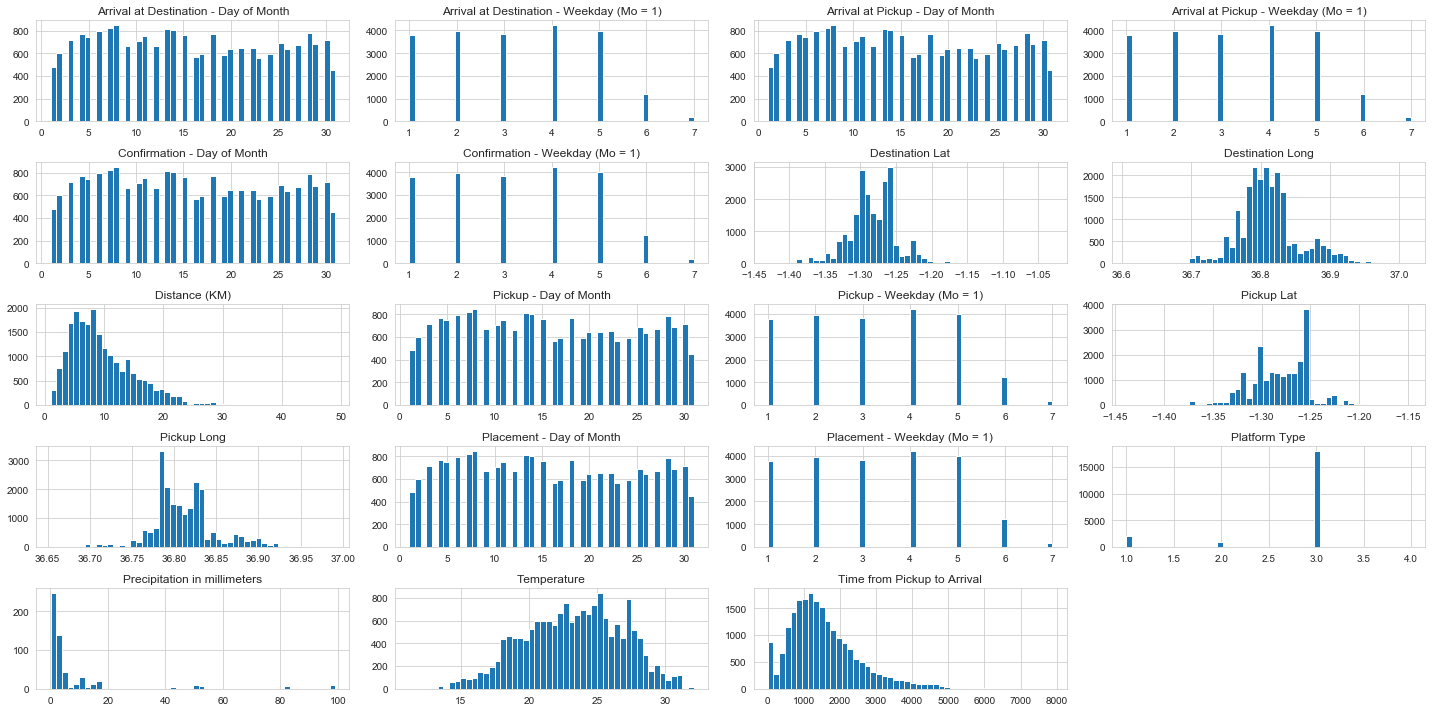

In [37]:
#Distribution review for train data
df_train[[column for column in df_train.select_dtypes(include='number')]].hist(bins=50, figsize=(20,10))
plt.tight_layout()
plt.show()

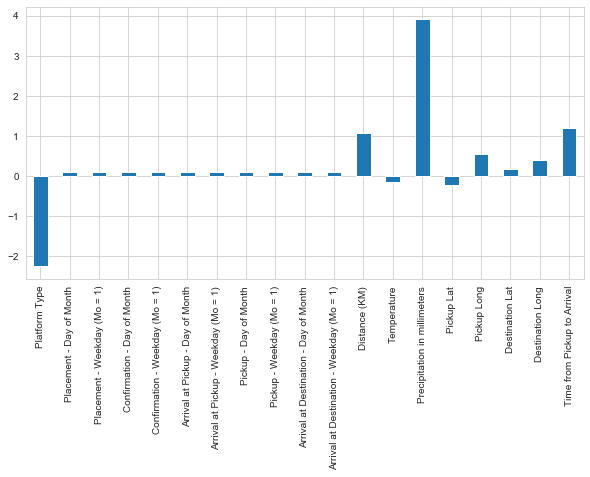

In [38]:
#Column Skewness of the testing dataset
df_train.skew().plot.bar(figsize =(10,5))
plt.show()

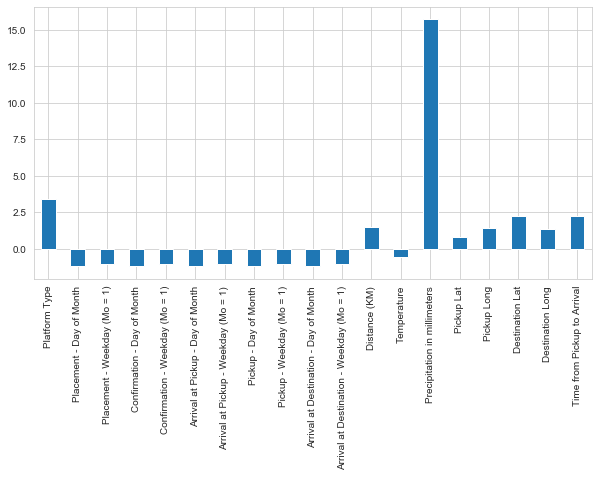

In [30]:
## Univariate Anaysis
# Calculating Skewness in the columns of our Training dataset
df_train.kurt().plot.bar(figsize =(10,5))
plt.show()

In [40]:
CorrMatrix_train = df_train.corr()
CorrMatrix_train.head(5)

,Platform Type,Placement - Day of Month,Placement - Weekday (Mo = 1),Confirmation - Day of Month,Confirmation - Weekday (Mo = 1),Arrival at Pickup - Day of Month,Arrival at Pickup - Weekday (Mo = 1),Pickup - Day of Month,Pickup - Weekday (Mo = 1),Arrival at Destination - Day of Month,Arrival at Destination - Weekday (Mo = 1),Distance (KM),Temperature,Precipitation in millimeters,Pickup Lat,Pickup Long,Destination Lat,Destination Long,Time from Pickup to Arrival
Platform Type,1.000000,0.012764,-0.058038,0.012770,-0.058005,0.012770,-0.058005,0.012770,-0.058005,0.012770,-0.058005,0.005528,0.225060,-0.055948,-0.002742,0.021327,0.006319,0.043924,-0.003827
Placement - Day of Month,0.012764,1.000000,0.026148,0.999998,0.026122,0.999998,0.026122,0.999998,0.026122,0.999998,0.026122,-0.007585,0.013097,-0.204143,-0.004929,-0.005453,0.007541,0.002077,-0.014710
Placement - Weekday (Mo = 1),-0.058038,0.026148,1.000000,0.026132,0.999952,0.026132,0.999952,0.026132,0.999952,0.026132,0.999952,0.003582,0.031064,-0.050592,-0.000918,0.011008,-0.004299,-0.000875,0.009693
Confirmation - Day of Month,0.012770,0.999998,0.026132,1.000000,0.026123,1.000000,0.026123,1.000000,0.026123,1.000000,0.026123,-0.007587,0.013099,-0.204143,-0.004923,-0.005448,0.007550,0.002073,-0.014701
Confirmation - Weekday (Mo = 1),-0.058005,0.026122,0.999952,0.026123,1.000000,0.026123,1.000000,0.026123,1.000000,0.026123,1.000000,0.003574,0.031074,-0.050592,-0.000883,0.011036,-0.004251,-0.000900,0.009744


Text(0.5, 1.05, 'Pearson Correlation of Features')

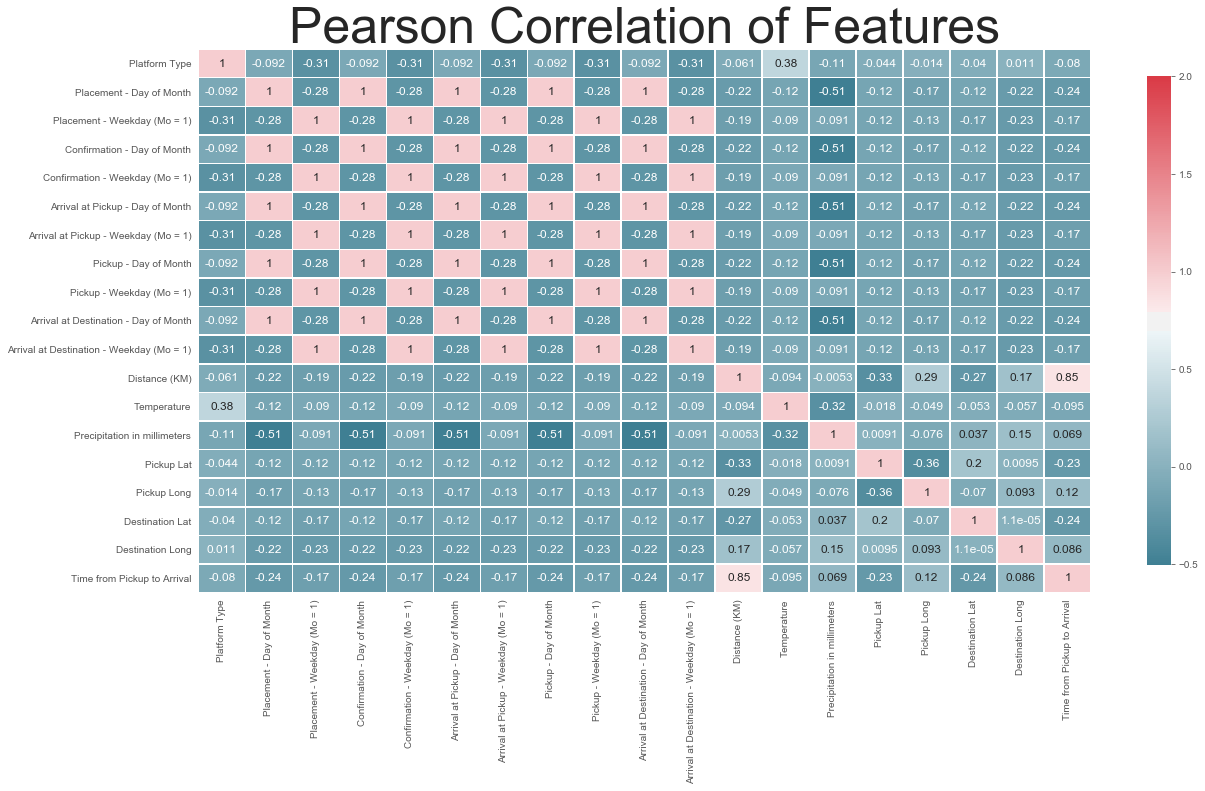

In [41]:
import matplotlib.style as style
style.use('ggplot')
cm = CorrMatrix_train.corr()
colormap = sns.diverging_palette(220, 10, as_cmap = True)
plt.figure(figsize=(20,10))
sns.heatmap(cm, annot=True, cmap = colormap,cbar_kws={'shrink':.9 },
           linewidths=0.5,vmax=2.0, linecolor='white',annot_kws={'fontsize':12 })
plt.title('Pearson Correlation of Features', y=1.05, size=50)

# Personal or Business

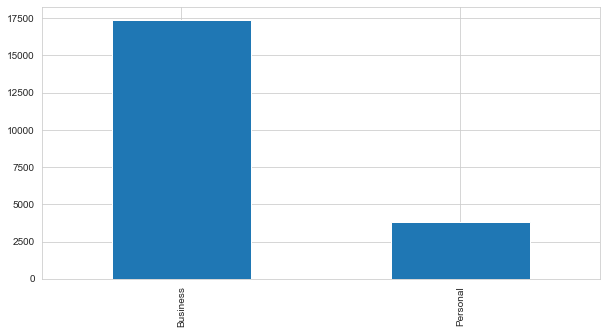

In [19]:
df_train['Personal or Business'].value_counts().plot(kind= 'bar' , figsize = [10,5])

# Platform Type

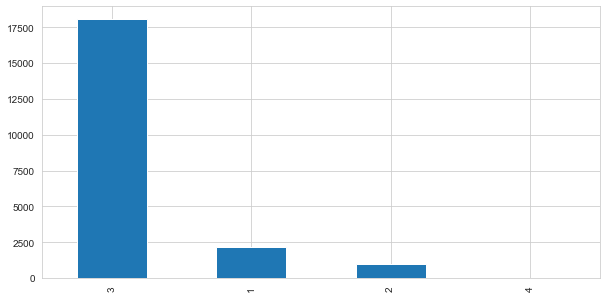

In [20]:
df_train['Platform Type'].value_counts().plot(kind= 'bar' , figsize = [10,5])

# Vehicle Type

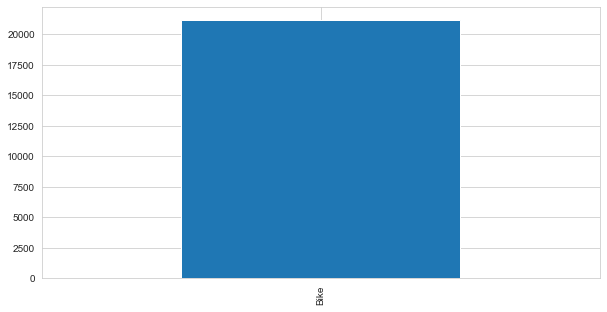

In [21]:
df_train['Vehicle Type'].value_counts().plot(kind= 'bar' , figsize = [10,5])

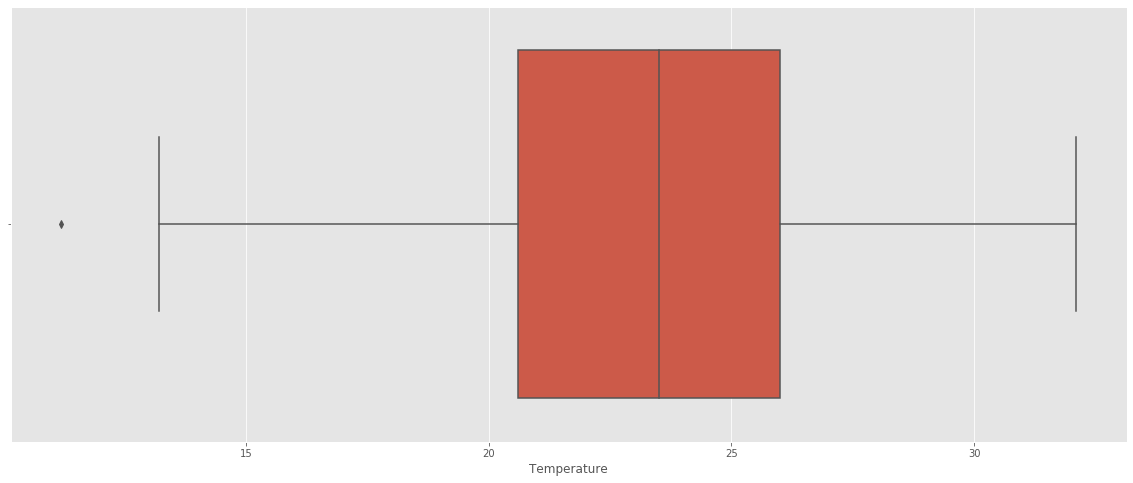

In [125]:
#Outliers Overview for numeric features
plt.figure(figsize=(20, 8))
sns.boxplot(df_train['Temperature'])
plt.show()

In [145]:
Numeric_Training = df_train._get_numeric_data()
Numeric_Training.head()

0    12.416667
1    33.216667
2     7.583333
3    22.350000
4    20.233333
Name: Time from Pickup to Arrival, dtype: float64

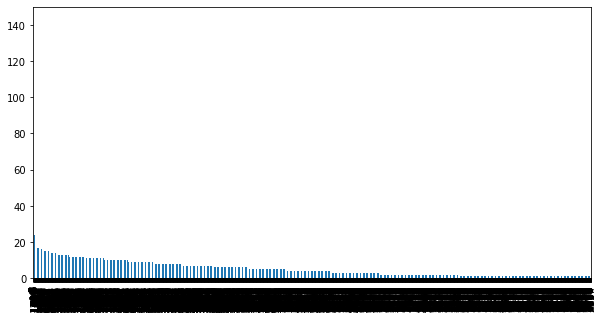

In [3]:
df_train['Time from Pickup to Arrival'].value_counts().plot(kind= 'bar' , figsize = [10,5])

In [4]:
l = df_train.values
number_of_columns= 12
number_of_rows = len(l)-1/number_of_columns
plt.figure(figsize=(number_of_columns,5*number_of_rows))
for i in range(0,len(l)):
    plt.subplot(number_of_rows + 1,number_of_columns,i+1)
    sns.set_style('whitegrid')
    sns.boxplot(df[l[i]],color='green',orient='v')
    plt.tight_layout()

NameError: name 'df' is not defined

ValueError: Image size of 864x7632330 pixels is too large. It must be less than 2^16 in each direction.

<Figure size 864x7.63233e+06 with 1 Axes>

In [151]:
plt.figure(figsize=(number_of_columns_Test,8*number_of_rows_Test))
for i in range(0,len(nu_tra)):
    plt.subplot(number_of_rows_Test + 1,number_of_columns_Test,i+1)
    chart=sns.distplot(df_train[nu_tra[i]],kde=True) 
    chart.set_xticklabels(chart.get_xticklabels(), rotation=-180, 
                          horizontalalignment='right')
plt.show()

TypeError: cannot do label indexing on <class 'pandas.core.indexes.range.RangeIndex'> with these indexers [12.416666666666666] of <class 'numpy.float64'>

ValueError: Image size of 360x12211660 pixels is too large. It must be less than 2^16 in each direction.

<Figure size 360x1.22117e+07 with 1 Axes>

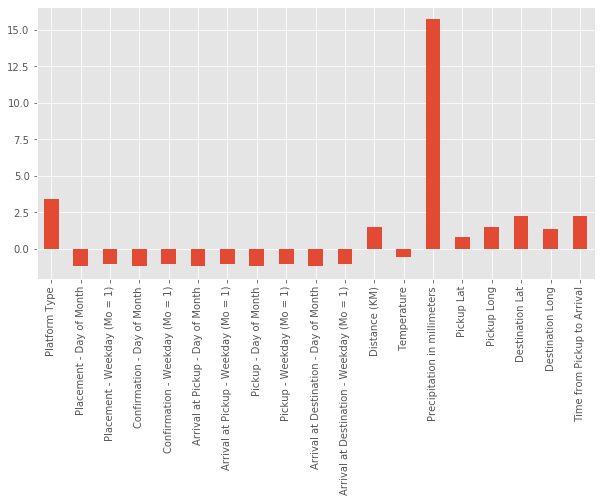

# Target

In [74]:
#Useful statistics about our target column

df_train['Time from Pickup to Arrival'].describe()

count    21201.000000
mean      1556.920947
std        987.270788
min          1.000000
25%        882.000000
50%       1369.000000
75%       2040.000000
max       7883.000000
Name: Time from Pickup to Arrival, dtype: float64

In [143]:
df_train

0        12.416667
1        33.216667
2         7.583333
3        22.350000
4        20.233333
           ...    
21196     0.150000
21197    12.833333
21198    49.216667
21199    23.000000
21200    35.466667
Name: Time from Pickup to Arrival, Length: 21201, dtype: float64

In [142]:
(df_train['Time from Pickup to Arrival']/60).hist(bins=50)
plt.title("Delivery time distribution")
plt.xlabel("Delivery time (minutes)")
plt.ylabel("Frequency")
plt.show()

KeyError: 'Time from Pickup to Arrival'

In [14]:
#Outliers Overview for numeric features
plt.figure(figsize=(20, 8))
sns.boxplot(x="variable", y="value", data=pd.melt(df_test))
plt.show()

ValueError: Neither the `x` nor `y` variable appears to be numeric.

<Figure size 1440x576 with 0 Axes>

In [ ]:
plt.figure(figsize=(2*number_of_columns,5*number_of_rows))
for i in range(0,len(l)):
    plt.subplot(number_of_rows + 1,number_of_columns,i+1)
    sns.distplot(df[l[i]],kde=True) 

# Data Cleaning and Formatting 

## Splitting the dataset into the Training set and Test set

## Training the Simple Linear Regression model on the Training set

## Predicting the Test set results

## Visualising the Training set results

## Visualising the Test set results